# Kernel Density Estimation

Kernel (Parzen) Density estimation on the Mystery.csv dataset, using gaussian kernel from scratch.

The function `gaussian_kernel(x, xp, ls, variance=1)` takes as inputs: `x`, a scalar or an array of points where the kernel is evaluated; `xp`, a scalar or an array of data points; `ls`, the length scale (or bandwidth) of the Gaussian kernel; and `variance`, the variance of the Gaussian kernel (which can be set to a default of 1). The function should compute and return the Gaussian kernel value as:

$$K(x, x') = \frac{1}{\sqrt{2 \pi \text{variance}}} \exp\left(- \frac{(x - x')^2}{2 \cdot \text{variance} \cdot \text{ls}^2}\right).$$

After implementing the Gaussian kernel function, we perform KDE on the dataset. We use ls = 0.05, and 100 evaluation points uniformly over the range [0,1]. We then plot the empirical density at each evaluation point.

Text(0.5, 1.0, 'KDE using Gaussian Kernel')

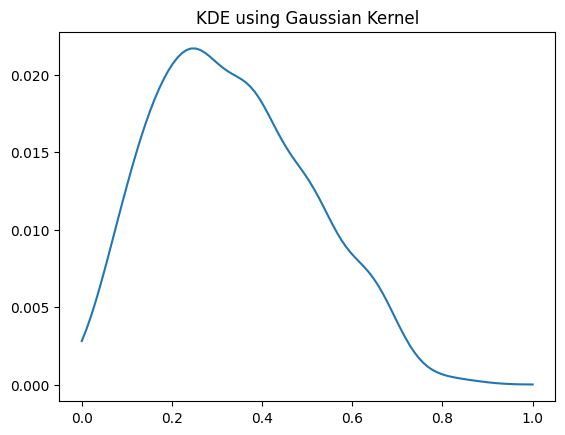

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### YOUR SOLUTION GOES HERE ###
df = pd.read_csv('Mystery.csv')
X = df[df.columns[1]].to_numpy()

def gaussian_kernel(x, xp, ls, variance=1):
    res = (1 / (2*np.pi*variance)**(1/2)) * np.exp(-(x-xp)**2 / (2*variance*ls**2))
    return res

evaluation_points = np.linspace(0,1,100)
ls = 0.05
density = np.zeros_like(evaluation_points)
for xp in X:
    density += gaussian_kernel(evaluation_points, xp, ls)

density /= np.sum(density)

plt.plot(evaluation_points, density)
plt.title('KDE using Gaussian Kernel')

Now we implement Kullback-Leibler (KL) divergence and use it to compare the empirical distribution from above to the fitted Beta and Gaussian distribution.


`compute_kl_divergence(ps, qs, epsilon=1e-3)` computes the empirical KL divergence b/w two probability distributions evaluated at a set of points over the domain: `ps` (the reference distribution) and `qs` (the model distribution). The folmula for KL divergence is:

$$D_{\text{KL}}(P \parallel Q) = \sum_x P(x) \log\left(\frac{P(x)}{Q(x)}\right).$$

KL Divergence for Normal Distribution =>  0.019047164096497676
KL Divergence for Beta Distribution =>  0.003786417656894137


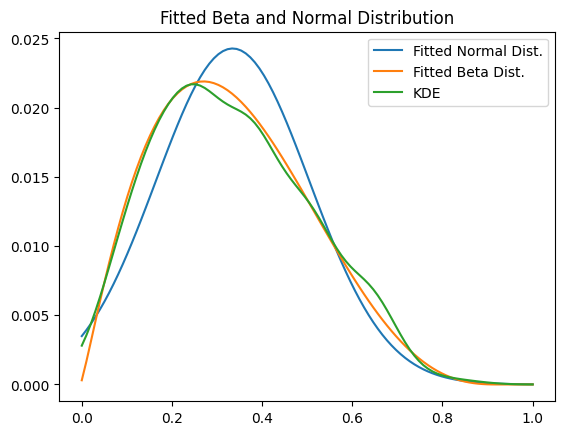

In [2]:
import scipy

# epsilon added to avoid issues of dividing by 0
def compute_kl_divergence(ps, qs, epsilon=1e-3):
    return np.sum((ps+epsilon) * np.log((ps+epsilon)/(qs+epsilon)))

a, b, c, d = scipy.stats.beta.fit(X)

norm_pdf = scipy.stats.norm.pdf(evaluation_points, np.mean(X), np.std(X))
norm_pdf /= np.sum(norm_pdf)

beta_pdf = scipy.stats.beta.pdf(evaluation_points, a, b, c, d)
beta_pdf /= np.sum(beta_pdf)

norm_density = np.zeros_like(X)
for x in X:
    norm_density += scipy.stats.norm.pdf(x,np.mean(X),np.std(X))

plt.plot(evaluation_points,norm_pdf,label='Fitted Normal Dist.')
plt.plot(evaluation_points,beta_pdf,label='Fitted Beta Dist.')
plt.plot(evaluation_points, density,label='KDE')
plt.title('Fitted Beta and Normal Distribution')
plt.legend()



print("KL Divergence for Normal Distribution => ", compute_kl_divergence(density, norm_pdf, epsilon=1e-3))
print("KL Divergence for Beta Distribution => ", compute_kl_divergence(density, beta_pdf, epsilon=1e-3))

The beta distribution fits the data better as it resulted in a lower KL divergence.

# Gradient Descent for Logistic Regression

Visualizing the cross-entropy loss after training a logistic regression model using gradient descent (from scratch) on the `heart.csv` dataset for 10 epochs:

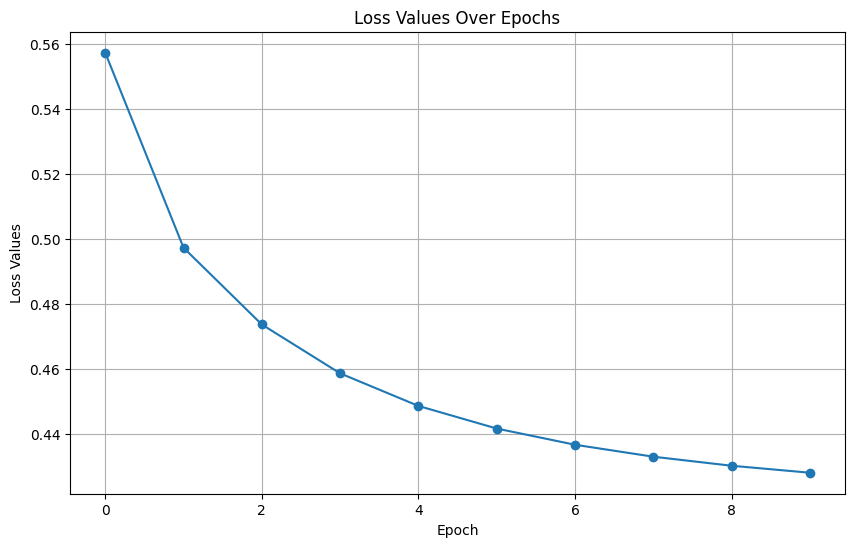

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart.csv')
X = df.iloc[:,0:13].to_numpy()
y = df['target'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Gets the y_hat value for logistic regression.
def predict_prob(w,x):
    res = 1 / (1 + np.exp(-np.dot(w,x)))
    return res

# Computes the gradient of the loss function with respect to the weight vector w
def compute_gradient(ys,xs,w):
    n = len(ys)
    grad = np.zeros_like(w)
    for i in range(n):
        x_i= xs[i]
        y_i = ys[i]
        y_hat_i = predict_prob(w, x_i)
        grad += (y_hat_i - y_i) * x_i   
    grad /= n
    return grad


def cross_entropy_loss(ys, xs, w):
    loss = 0
    for i in range(len(ys)):
        y_hat = predict_prob(w, xs[i])
        loss -= ys[i] * np.log(y_hat + 1e-10) + (1 - ys[i]) * np.log(1 - y_hat + 1e-10)
    return loss / len(ys)

def grad_descent(X, y, learning_rate=1e-4, tolerance=1e-6, max_iterations=10000, epochs=10):
    n, m = X.shape
    w = np.zeros(m)
    loss_vals = []

    for epoch in range(epochs):
        for i in range(max_iterations):
            grad = compute_gradient(y, X, w)
            w_prev = w.copy()
            w -= learning_rate * grad
            
            if np.linalg.norm(w - w_prev) < tolerance:
                break
        
        loss = cross_entropy_loss(y_test, X_test, w)
        loss_vals.append(loss)

    return w, loss_vals

w, loss_vals = grad_descent(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.plot(loss_vals, marker='o')
plt.title('Loss Values Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss Values')
plt.grid()
plt.show()
